In [2]:
#library
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
#1. import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [9]:
numerics = ['int64','float64'] 
train_numeric = train.select_dtypes(include=numerics) 
test_numeric = test.select_dtypes(include=numerics)

In [10]:
train_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
#initialization
knn = KNeighborsRegressor(n_neighbors=5)

In [13]:
#prepare independent and target, then split it into train and validation
x = train_numeric.drop(['SalePrice'],axis=1)
y = train_numeric ['SalePrice']
x = x.fillna(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=30)

In [14]:
#learning
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [15]:
# validation prediction MSE
y_test_pred = knn.predict(x_test)
mean_squared_error(y_test, y_test_pred)

2733220547.0040665

In [16]:
# train prediction MSE
y_train_pred = knn.predict(x_train)
mean_squared_error(y_train, y_train_pred)

1454372672.2223721

In [17]:
train_mse = []
test_mse = []
K = []
for k in range(1,20,2):
    #print('k = {0}'.format(k))
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_test_pred = knn.predict(x_test)
    vali_mse = mean_squared_error(y_test, y_test_pred)
    test_mse.append(vali_mse)
    y_train_pred = knn.predict(x_train)
    tr_mse = mean_squared_error(y_train, y_train_pred)
    train_mse.append(tr_mse)
    K.append(k)
    print("when K = {2}, train MSE = {0} , test MSE = {1}".format(tr_mse,vali_mse, k ))
    

when K = 1, train MSE = 0.0 , test MSE = 3228182291.124481
when K = 3, train MSE = 1124146514.5825949 , test MSE = 2819224993.1966343
when K = 5, train MSE = 1454372672.222372 , test MSE = 2733220547.0040665
when K = 7, train MSE = 1627947166.9006927 , test MSE = 2793490229.144677
when K = 9, train MSE = 1731792373.8821225 , test MSE = 2795059769.1657705
when K = 11, train MSE = 1856168076.6537378 , test MSE = 2901673355.832636
when K = 13, train MSE = 1957739714.438959 , test MSE = 2953437336.1552463
when K = 15, train MSE = 2031957668.1588912 , test MSE = 3069469152.6183953
when K = 17, train MSE = 2078694217.5415828 , test MSE = 3144214373.2310653
when K = 19, train MSE = 2104979857.6290016 , test MSE = 3213600426.3526173


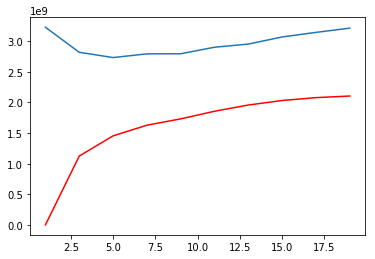

In [18]:
plt.plot(K, train_mse,color='r')
plt.plot(K, test_mse,)
plt.show()

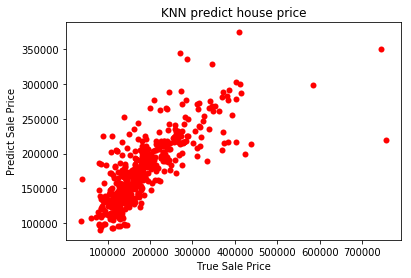

In [25]:
#plot
plt.scatter(y_test, y_test_pred, color='r', linewidth=0.01)
plt.xlabel("True Sale Price")
plt.ylabel("Predict Sale Price")
plt.title("KNN predict house price")
plt.show()

# Submission

In [20]:
test_numeric = test_numeric.fillna(0) #fill na to 0
test_numeric_pred = knn.predict(test_numeric) # use knn to predict test_numeric
#test_numeric['SalePrice'] = test_numeric_pred
#result = test_numeric[['Id','SalePrice']]
#result.to_csv('submission_knn_version_0.csv',index=False)

In [21]:
test_numeric['SalePrice'] = test_numeric_pred
result = test_numeric[['Id','SalePrice']]
result.to_csv('submission_knn_version_0.csv',index=False)